360
Done


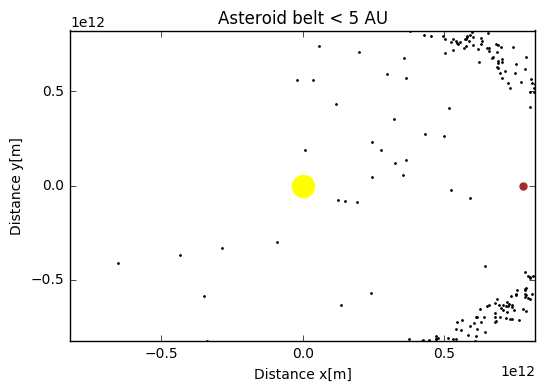

In [25]:
import random
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython import display
import pylab as pl
import math
%matplotlib inline



G = 6.67*10**(-11) #SI units
m_sun = 2*10**30 #kg
m_jup = 1.898*10**27 #kg
AU = 1.496*10**11 #m
pos_jup = 5.2 * AU,0,0 #m
pos_sun = 0,0,0 #m
dt = 3600*24 #dag
N = 1000 #unitless
tijd = 365 #dag


inner_r = 4 #AU
outer_r = 4.5 #AU
r_max_kwad = 4.5**2 #AU^2
r_min_kwad = 16 #AU^2

def startvalue_generator(N):
    x_list = []
    y_list = []
    prop_non_plot_list_start = []
    N_succeed = 0
    while N_succeed < N:
        x = random.uniform(-outer_r, outer_r)
        y = random.uniform(-outer_r, outer_r)
        if x**2 + y**2 <= r_max_kwad and x**2 + y**2 >= r_min_kwad:
            x = x * AU
            y = y * AU
            z = random.uniform(-0.1, 0.1) #random units
            d = np.sqrt(x**2 + y**2)
            vscaler = random.uniform(0.9, 1.1) #small variation on kepler
            v = np.sqrt(G*m_sun/d) * vscaler
            theta = math.atan(y/x)
            v_x = v * np.cos(theta)
            v_y = v * np.sin(theta)
            v_z = np.sqrt(G*m_sun*np.abs(z**(-1))) * vscaler #random units atm
            v_z = 0 #just testing
            props_non_plot = [z, v_x, v_y, v_z]
            x_list.append(x)
            y_list.append(y)
            prop_non_plot_tuple = tuple(props_non_plot)
            prop_non_plot_list_start.append(prop_non_plot_tuple)
            N_succeed = N_succeed + 1
    return x_list,y_list, prop_non_plot_list_start
    
#################### 2D plot starts here ##########################
#N = 1000
#properties = startvalue_generator(N)
#x_list = []
#y_list = []
#z_list = []
#for i in range(N):
#    x = properties[i][0]
#    x_list.append(x*AU)
#    y = properties[i][1]
#    y_list.append(y*AU)
#    z = properties[i][3][0]
#    z_list.append(z*AU)

    

#print 'The number of astroids in this figure = %.5g' % N
#plt.scatter(x_list, y_list, 1, color='black', label='Asteroid')
#plt.scatter([5*AU], [0], 25, color='brown', label='Jupiter')
#plt.scatter([0], [0], 250, color='yellow', label='Sun')
#plt.title('Asteroid belt < 5 AU')
#plt.xlabel('Distance x[m]')
#plt.ylabel('Distance y[m]')
#plt.legend(loc=3, scatterpoints=1)
#plt.show()
#################### 2D plot ends here ##########################


def euler_cromer(x_last_plot,y_last_plot, pos_vel_non_plot):
    '''
    Input: 
    Output: 
    How: 
    '''
    x_last = x_last_plot
    y_last = y_last_plot
    z_last = pos_vel_non_plot[0]
    vx_last = pos_vel_non_plot[1]
    vy_last = pos_vel_non_plot[2]
    vz_last = pos_vel_non_plot[3]
    x_sun, y_sun, z_sun = pos_sun
    x_jup, y_jup, z_jup = pos_jup

    dist_ast_to_sun = np.sqrt((x_last - x_sun)**2 + (y_last - y_sun)**2 + (z_last - z_sun)**2)
    dist_ast_to_jup = np.sqrt((x_last - x_jup)**2 + (y_last - y_jup)**2 + (z_last - z_jup)**2)
    
    a_x = -G * m_sun * (x_last - x_sun)/(dist_ast_to_sun**3) - G * m_jup * (x_last - x_jup)/(dist_ast_to_jup**3)
    a_y = -G * m_sun * (y_last - y_sun)/(dist_ast_to_sun**3) - G * m_jup * (y_last - y_jup)/(dist_ast_to_jup**3)
    a_z = -G * m_sun * (z_last - z_sun)/(dist_ast_to_sun**3) - G * m_jup * (z_last - z_jup)/(dist_ast_to_jup**3)

    vx_new = vx_last + a_x * dt
    vy_new = vy_last + a_y * dt
    vz_new = vz_last + a_z * dt
    x_new = x_last + vx_new * dt
    y_new = y_last + vy_new * dt
    z_new = z_last + vz_new * dt
#    print vx_new, 'v_x in m/s |||', vy_new, 'v_y in m/s |||', x_new, 'x in m |||', y_new, 'y in m |||'
    pos_vel_new_non_plot = tuple([z_new, vx_new, vy_new, vz_new])
    return x_new, y_new, pos_vel_new_non_plot


def asteroids(tijd):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    x_list, y_list, pos_vel_non_plot = startvalue_generator(N)
    for t in range(tijd):    
        for deeltje in range(len(x_list)):
            x_last_plot = x_list[deeltje]
            y_last_plot = y_list[deeltje]
            pos_vel_last_non_plot = pos_vel_non_plot[deeltje]
            x_new, y_new, pos_vel_new_non_plot = euler_cromer(x_last_plot, y_last_plot, pos_vel_last_non_plot)
            x_list[deeltje] = x_new
            y_list[deeltje] = y_new
            pos_vel_non_plot[deeltje] = pos_vel_new_non_plot
        if t % 30 == 0:
            #while True:
                #try:
                
            fig.clear()
            plt.scatter(pos_jup[0], pos_jup[1], s = 25, color = 'brown')
            plt.scatter(pos_sun[0], pos_sun[1], s = 250, color = 'yellow')
            plt.scatter(x_list,y_list, s = 1, color = 'black')
            plt.title('Asteroid belt < 5 AU')
            plt.xlabel('Distance x[m]')
            plt.ylabel('Distance y[m]')
            plt.axis([-5.5*AU,5.5*AU,-5.5*AU,5.5*AU])
            display.display(pl.gcf())

            display.clear_output(wait=True)
            
            time.sleep(1.0)
            print t
                #except KeyboardInterrupt:
                    #break
    return 'Done'

print asteroids(tijd)

#################### 3D plot starts here ##########################
#from mpl_toolkits.mplot3d import Axes3D

#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')

#ax.scatter(x_list, y_list, z_list, s=1, color='black', label='Asteroid')
#ax.scatter([5*AU], [0], [0], s=25, color='brown', label='Jupiter')
#ax.scatter([0], [0], [0], s=250, color='yellow', label='Sun')
#ticks = [-5*AU, 0, 5*AU]
#ax.set_xlabel('x[m]')
#ax.set_ylabel('y[m]')
#ax.set_zlabel('z[m]')
#ax.set_xbound(-5*AU, 5*AU)
#ax.set_ybound(-5*AU, 5*AU)
#ax.set_zbound(-5*AU, 5*AU)
#ax.set_xticks(ticks)
#ax.set_yticks(ticks)
#ax.set_zticks(ticks)

#plt.legend(loc=3, scatterpoints=1)
#plt.show()
#################### 3D plot ends here ##########################